## Sampling Bootstrapping

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
spotify = pd.read_feather("C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Advanced Machine Learning\\DSC 540 - Week 3\\Data File\\spotify_2000_2020.feather")
spotify.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [16]:
# check the shape of the data
spotify.shape

(41656, 20)

In [17]:
# add the index into the dataset as a column
spotify.reset_index(inplace = True)
spotify.head()

,index,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,...,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,...,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,...,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,...,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,...,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [18]:
n_sample = 1000

# create a single sample
spotify_sample = spotify.sample(n = n_sample, replace = False, random_state = 123)

# create a single bootstrap
spotify_1_resample = spotify_sample.sample(n = n_sample, replace = True, random_state = 42)

In [19]:
spotify_1_resample.head()

,index,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
25172,25172,0.4970,"[""Gov't Mule""]",0.431,467800.0,7.796667,0.586,0.0,3lzYx9dpCNw6CkttQe6SlE,0.002010,...,0.1600,-8.077,1.0,Soulshine,55.0,2001-10-23,0.0773,126.134,0.262,2001.0
24865,24865,0.1890,"['Mustard', 'NAV', 'Playboi Carti', 'A Boogie ...",0.883,174100.0,2.901667,0.525,1.0,2zjGJ0dChMR0KxBZS15aqo,0.000000,...,0.0971,-8.054,0.0,"Baguettes in the Face (feat. NAV, Playboi Cart...",79.0,2019-06-28,0.0633,99.978,0.312,2019.0
32305,32305,0.7340,['Kid Cudi'],0.860,228493.0,3.808217,0.638,1.0,6GSMozgAebBmuM2hCV15H3,0.000708,...,0.1050,-5.773,1.0,Ashin’ Kusher,53.0,2010-01-01,0.2010,92.997,0.584,2010.0
15665,15665,0.2770,['Eugene Wilde'],0.623,314104.0,5.235067,0.633,0.0,35Z9SYT8AjvgvUag0H4iQt,0.000000,...,0.0384,-6.768,1.0,Gotta Get You Home Tonight,45.0,2010-10-19,0.0563,93.116,0.575,2010.0
33871,33871,0.0446,['Jace Everett'],0.591,164440.0,2.740667,0.864,0.0,4VIDVd87GQcBSbofvDp8Pj,0.005710,...,0.2790,-4.706,0.0,Bad Things,48.0,2005-11-22,0.0399,131.006,0.728,2005.0


In [20]:
spotify_sample['index'].value_counts()

index
4132     1
17252    1
31415    1
25418    1
40124    1
        ..
23504    1
9017     1
32364    1
34972    1
18515    1
Name: count, Length: 1000, dtype: int64

In [21]:
spotify_1_resample['index'].value_counts()

index
35880    7
8143     6
31415    5
6595     5
32639    5
        ..
23215    1
27350    1
25996    1
14011    1
15811    1
Name: count, Length: 615, dtype: int64

In [22]:
# calculate the mean of the danceability column of spotify_sample
np.mean(spotify_sample['danceability'])

0.5829553

In [23]:
# calculate the mean of the danceability column of spotify_1_resample
np.mean(spotify_1_resample['danceability'])


0.5848888

In [24]:
# replicate the bootstrap resampling 1000 times
resample_danceability_1000 = ([])

for i in range(1000):
	spotify_sample_mean = np.mean(spotify_sample.sample(n = n_sample, replace = True)['danceability'])
	resample_danceability_1000.append(spotify_sample_mean)

resample_danceability_1000 = np.array(resample_danceability_1000)
print(resample_danceability_1000.mean())

0.5830225138


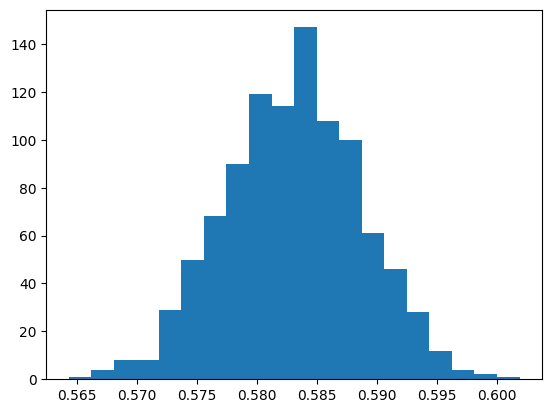

In [25]:
# draw a histogram of the bootstrap means
plt.hist(resample_danceability_1000, bins = 20)
plt.show()

### Sampling

In [26]:
sampling_distribution = []

# generate a sampling distribution of 2000 replicates without replace
for i in range(2000):

    # sample 500 rows and calculate the mean popularity
    spotify_sample_ = spotify.sample(n = n_sample, replace = False)['popularity'].mean()
    sampling_distribution.append(spotify_sample_)

print(sampling_distribution[:10])

[54.969, 54.884, 54.676, 54.634, 54.142, 54.677, 54.677, 55.147, 54.648, 54.743]


### Bootstrapping

In [27]:
bootstrap_distribution = []

spotify_sample = spotify.sample(n = n_sample, replace = False, random_state = 345)

# generate a bootstrap distribution of 2000 replicates
for i in range(2000):

    # resample 500 rows and calculate the mean popularity with replace
    spotify_resample_ = spotify_sample.sample(n = n_sample, replace = True)['popularity'].mean()
    bootstrap_distribution.append(spotify_resample_)

print(bootstrap_distribution[0:10])

[55.273, 55.529, 55.454, 56.218, 55.18, 55.299, 56.264, 55.239, 55.574, 55.642]


### Check the mean statistic

In [28]:
pop_mean = spotify['popularity'].mean()
sample_mean = spotify_sample['popularity'].mean()
sample_distn_mean = np.mean(sampling_distribution)
boot_distn_mean = np.mean(bootstrap_distribution)

print([pop_mean, sample_mean, sample_distn_mean, boot_distn_mean])

[54.837142308430955, 55.553, 54.834667499999995, 55.5590245]


- The sampling distribution mean is the best estimate of the true population mean
- The bootstrap distribution mean is closest to the original sample mean.

### Checking on the standard deviation statistic

In [29]:
pop_sd = spotify['popularity'].std(ddof = 0)
sample_sd = spotify_sample['popularity'].std()
sample_distn_sd = np.std(sampling_distribution, ddof = 1) * np.sqrt(n_sample)
boot_distn_sd = np.std(bootstrap_distribution, ddof = 1) * np.sqrt(n_sample)

print([pop_sd, sample_sd, sample_distn_sd, boot_distn_sd])

[10.880065274257536, 10.72642751559191, 10.72486397570611, 10.465568353425917]
